In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [2]:
df = pd.read_csv("/Users/sa24/Desktop/Housing-Prices/house-prices-advanced-regression-techniques/train.csv")

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [17]:
story = df["MSSubClass"].value_counts()
story

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

/var/folders/fz/fjrs1yms7rbcd_w7wg96j1fm0000gn/T/ipykernel_75766/2830426938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="MSZoning", palette="plasma")


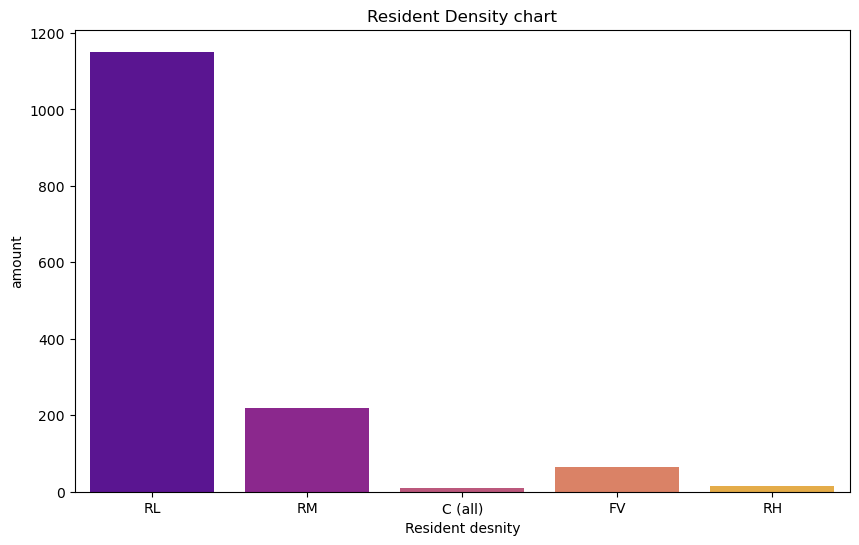

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="MSZoning", palette="plasma")
plt.xlabel("Resident desnity")
plt.ylabel("amount")
plt.title("Resident Density chart")
plt.show()

A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park 
RM	Residential Medium Density

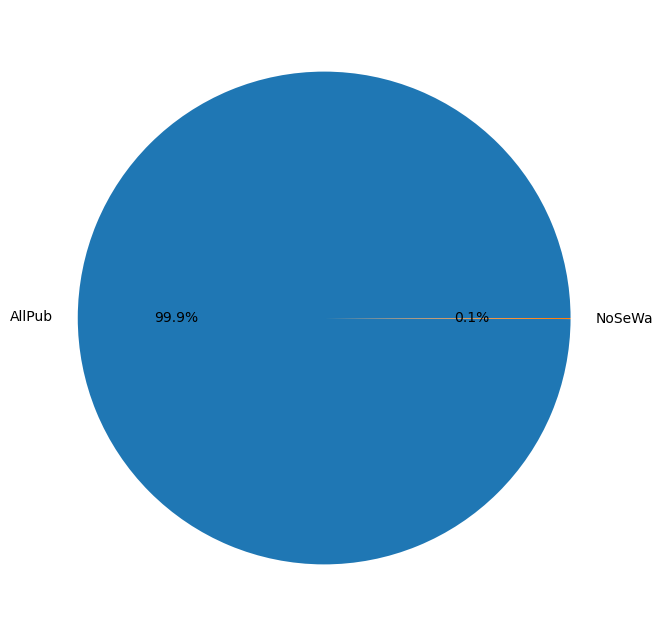

In [ ]:
plt.figure(figsize=(12,8))
df["Utilities"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Utilities')
plt.ylabel("")
plt.title("Percentage of Utilities")
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

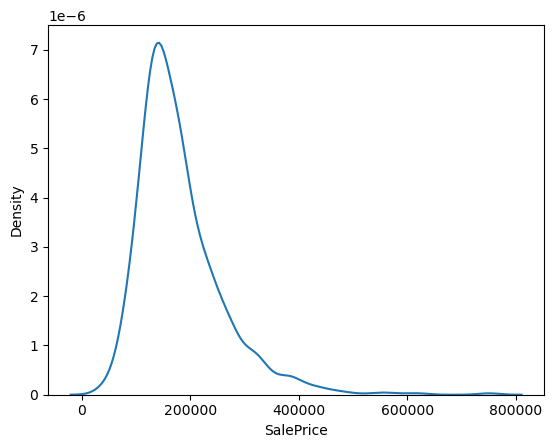

In [15]:
sns.kdeplot(data=df, x="SalePrice")

/var/folders/fz/fjrs1yms7rbcd_w7wg96j1fm0000gn/T/ipykernel_75766/1387804445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="HouseStyle", palette="plasma")


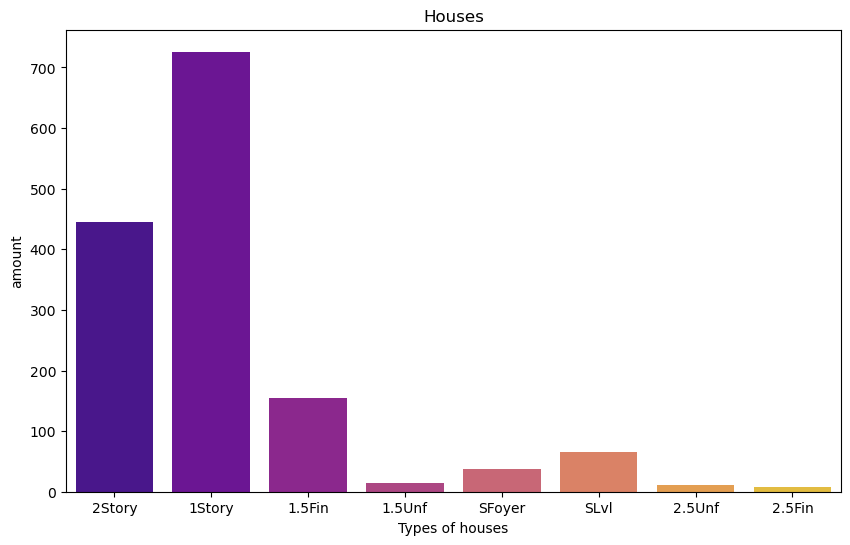

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="HouseStyle", palette="plasma")
plt.xlabel("Types of houses")
plt.ylabel("amount")
plt.title("Houses")
plt.show()

In [ ]:
max_price = df["SalePrice"].max()
hundred = 100_000
price_per_100 = np.arange(0, (max_price // hundred + 2) * hundred, hundred)
# Bin the prices
df["price_bin"] = pd.cut(df["SalePrice"], bins=price_per_100)
price_df = df["price_bin"].value_counts().sort_index().to_frame(name="count")
price_df
# Group by price_bin and Condition 1
Condition1_effect= df.groupby(["price_bin", "Condition1"]).size().unstack(fill_value=0)
Condition1_effect

/var/folders/fz/fjrs1yms7rbcd_w7wg96j1fm0000gn/T/ipykernel_75766/555325955.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Condition1_effect= df.groupby(["price_bin", "Condition1"]).size().unstack(fill_value=0)


Condition1,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
price_bin,,,,,,,,,
"(0, 100000]",10,14,97,0,0,1,1,0,0
"(100000, 200000]",35,61,767,4,10,10,19,2,2
"(200000, 300000]",1,6,288,3,7,0,5,0,2
"(300000, 400000]",1,0,82,1,2,0,0,0,1
"(400000, 500000]",1,0,17,0,0,0,1,0,0
"(500000, 600000]",0,0,5,0,0,0,0,0,0
"(600000, 700000]",0,0,2,0,0,0,0,0,0
"(700000, 800000]",0,0,2,0,0,0,0,0,0


<Axes: xlabel='BsmtFinType1', ylabel='SalePrice'>

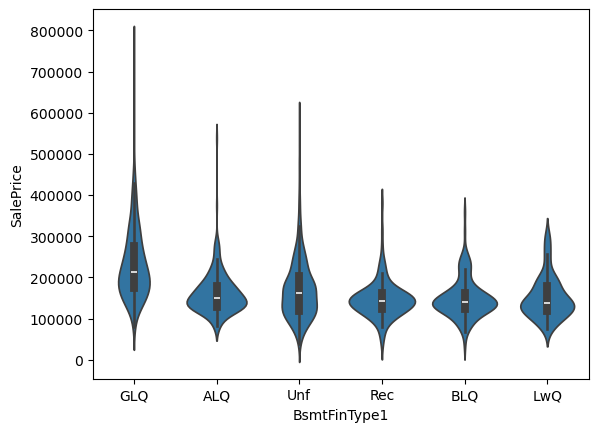

In [41]:
sns.violinplot(x=df["BsmtFinType1"], y=df["SalePrice"])



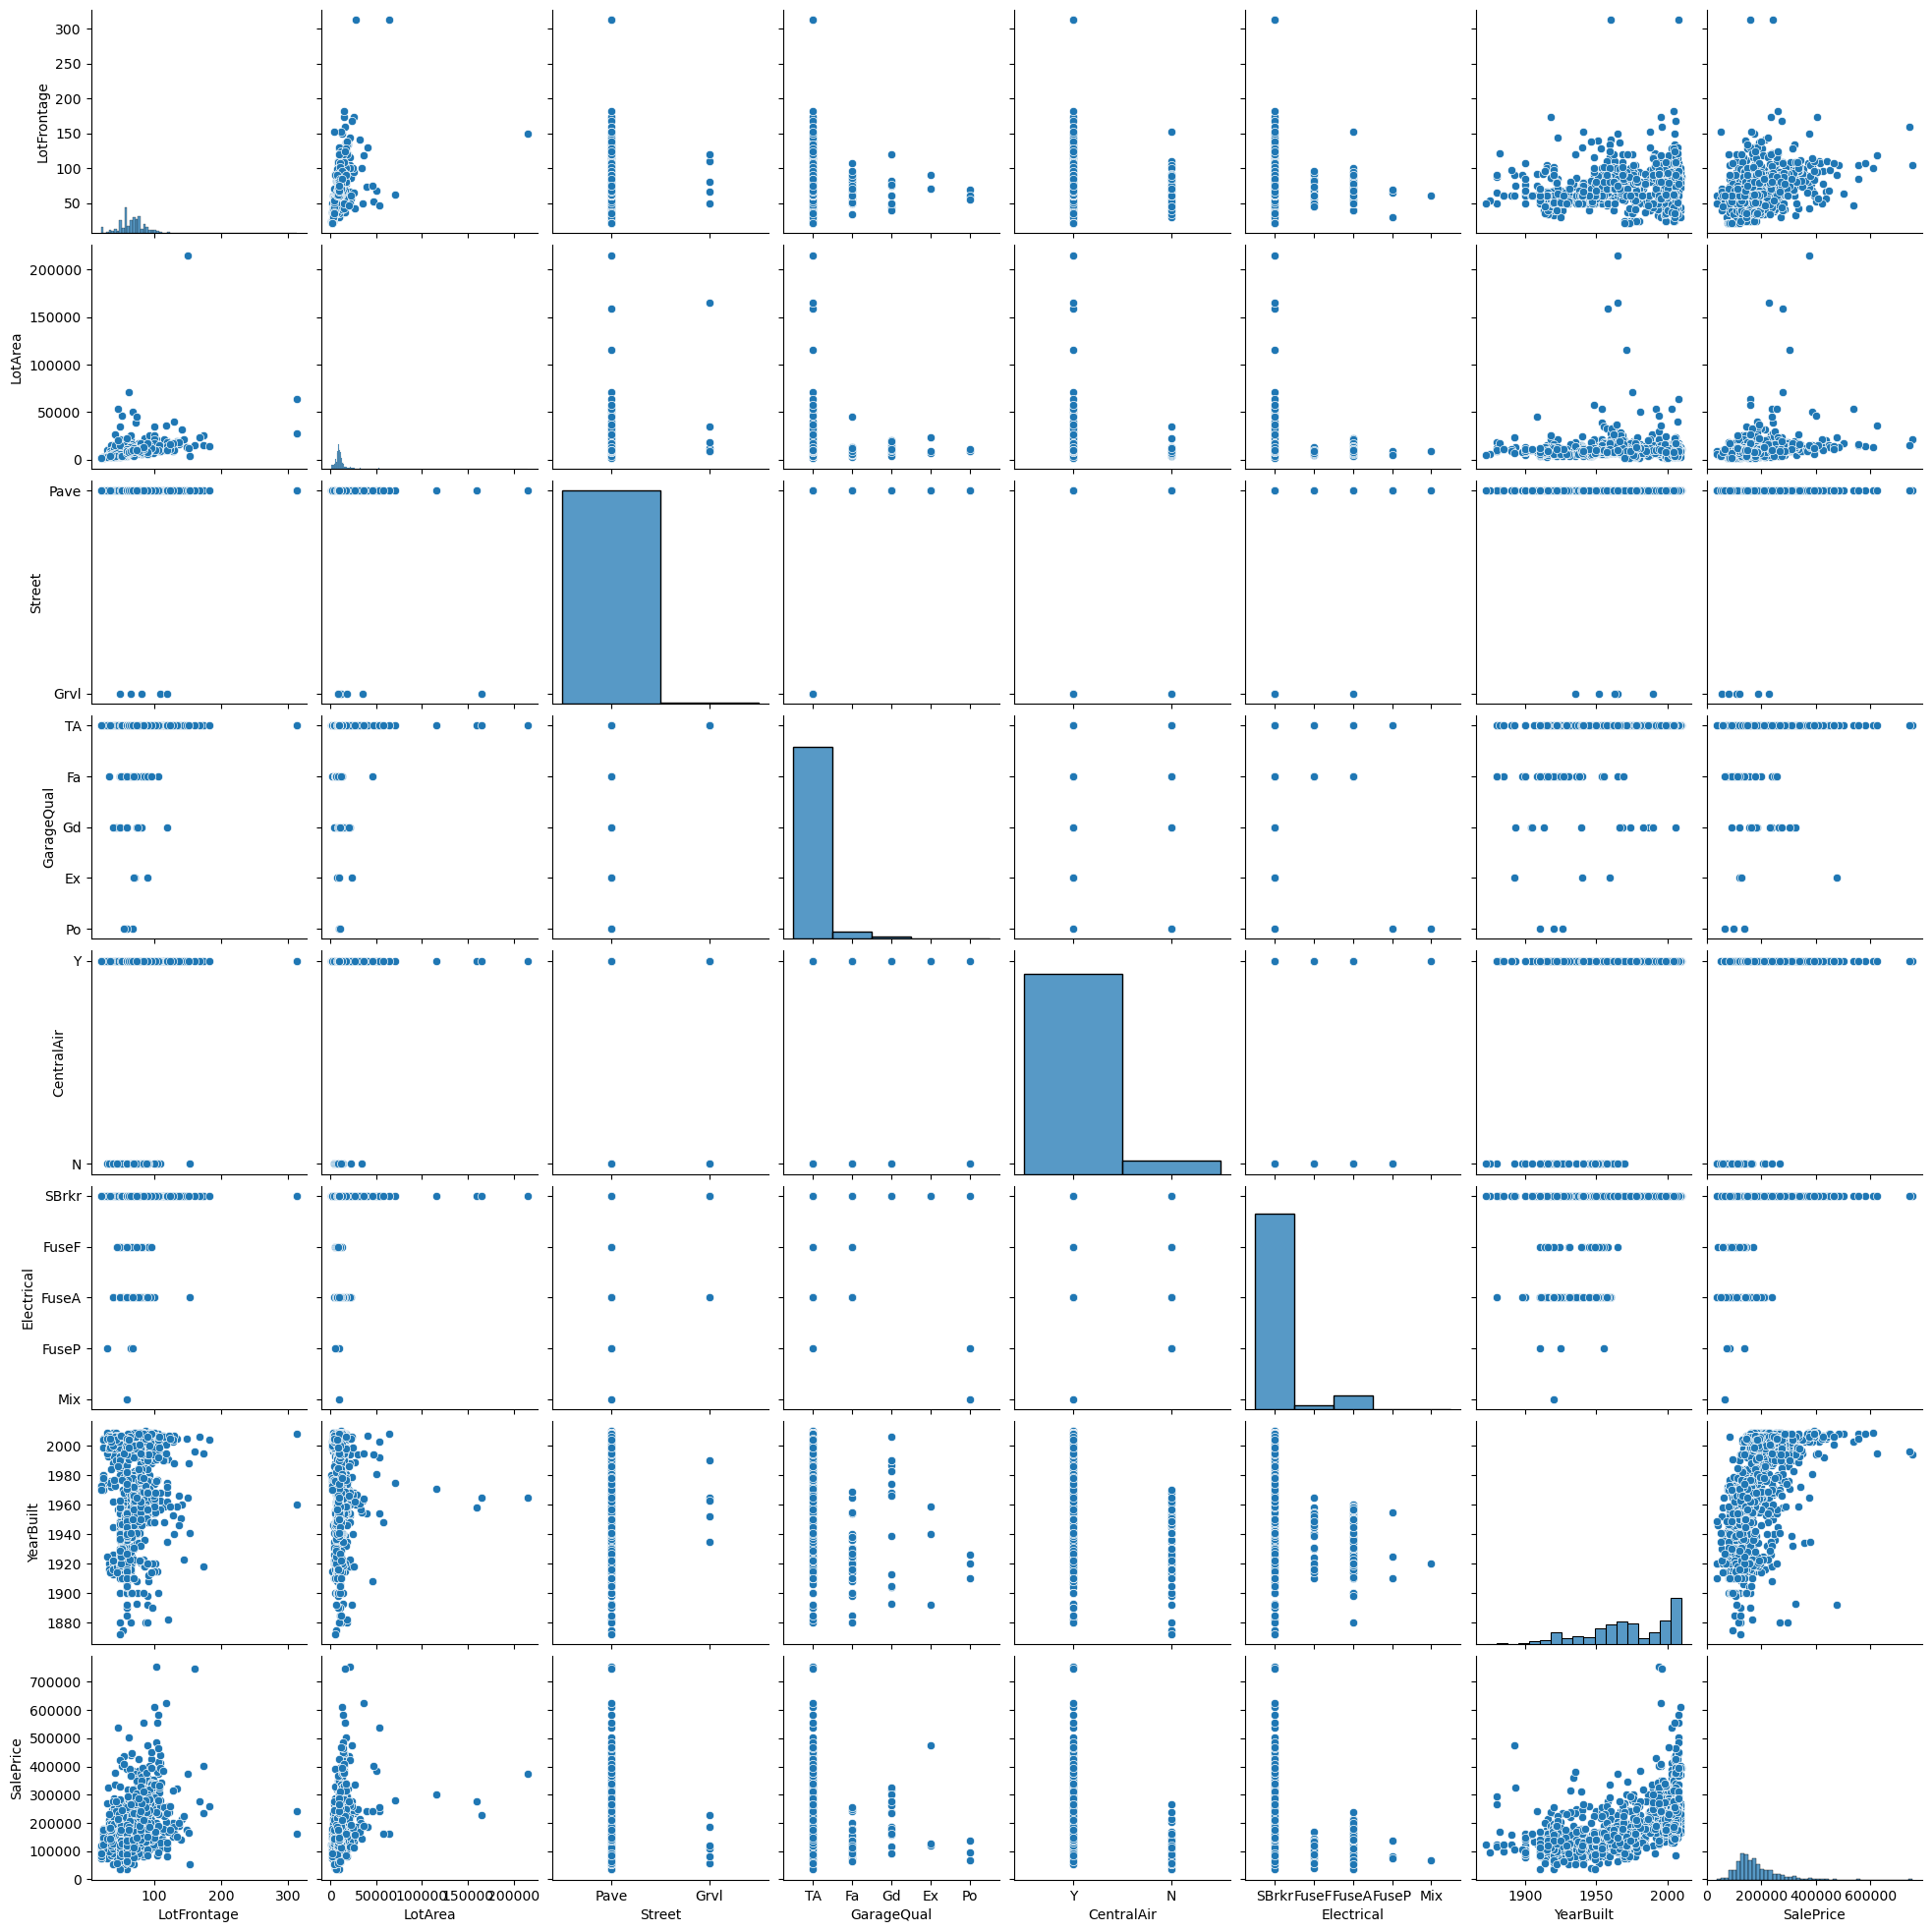

In [47]:
sns.pairplot(df, vars=["LotFrontage", "LotArea", "Street", "GarageQual", "CentralAir", "Electrical", "YearBuilt","SalePrice"])